# Predicting building heating and cooling loads using machine learning


## Life-cycle of machine learning project
* Understanding the problem statement
* Data collection and wrangling
* Exploratory data analysis (EDA)
* Data pre-processing
* Model training
* Choose the best model using the proper performance metrics

## 1) Problem statement 
* Buildings are responsible for around 40% of the global energy consumption and 33% of greenhouse gas emissions, thus sustainable and energy efficient buiulding designs are essential ways to alleviate climate change.
* In terms of efficient building designs, accurate computation of heating and cooling loads is required to determine the number and configuration of heating and cooling equipment so as to ensure the desired indoor air condition without wasting extra energy consumption.
* In general, heating and cooling loads are related to the characteristics of building envelop (thermal mass effect, etc.) and of the conditioned space (occupancy and activity levels), the local weather condition, the intended use (residential or industrial buildings). 

## 2) Data collection
* Data source - https://archive.ics.uci.edu/ml/datasets/Energy+efficiency

## 3) Data description
* The data has 768 training examples with 8 input variables (X1 to X8) and 2 output variables (Y1 and Y2)
    * X1: relative compactness
    * X2: surface area
    * X3: wall area
    * X4: roof area
    * X5: overall height
    * X6: orientation
    * X7: glazing area
    * X8: glazing area distribution
    * Y1: heating load
    * Y2: cooling load

## 1 Import libraries and required packages

### Import numpy, pandas, matplotlib, etc.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [10, 5]

### Import .csv file as pandas dataframe

In [2]:
df = pd.read_csv('data/ENB2012_data.csv')

### Print a concise summary of the dataframe including index dtype, columns, non-null values and memory use

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


### Show the first 5 data entries

In [4]:
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### Shape of the dataframe

In [5]:
df.shape

(768, 10)

### Show descriptive statistics

In [6]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## 2 Data checks to perform
* Check missing values
* check duplicates
* check the number of unique values
* check categories in different categorical columns

### Check missing values

In [7]:
df.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

### Check duplicates

In [8]:
df.duplicated().sum()

0

### Check the number of unique values in each column

In [9]:
df.nunique()

X1     12
X2     12
X3      7
X4      4
X5      2
X6      4
X7      4
X8      6
Y1    586
Y2    636
dtype: int64

## 3 Plotting probability densities of each variable using histograms

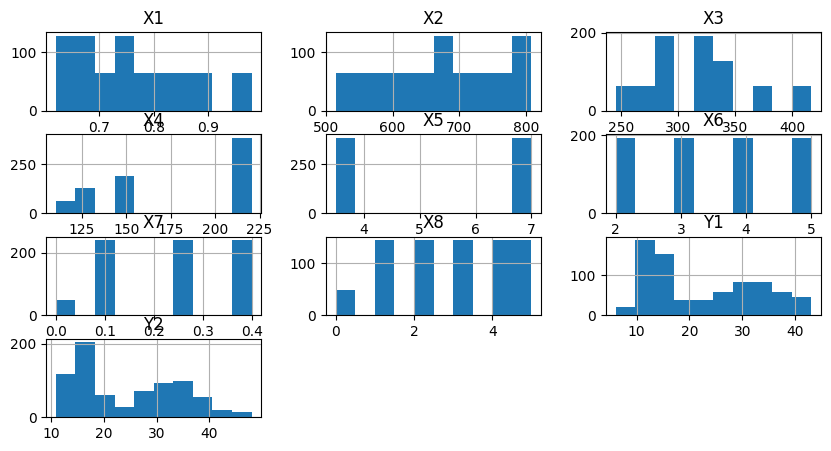

In [10]:
hist = df.hist(bins=10)

### Insight:
* Histograms show that the data is non-Gaussian

In [11]:
# normaliza the data to lie between 0 and 1
scale = MinMaxScaler()
df_normalize = pd.DataFrame(scale.fit_transform(df.values), columns=df.columns, index=df.index)

In [12]:
df_normalize.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085


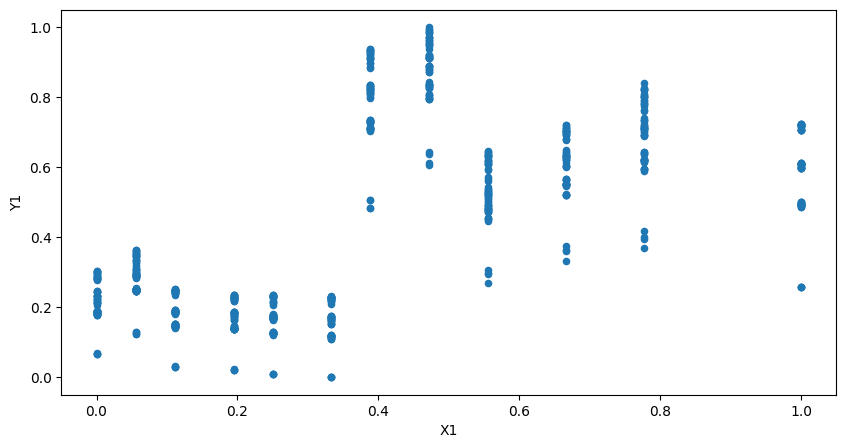

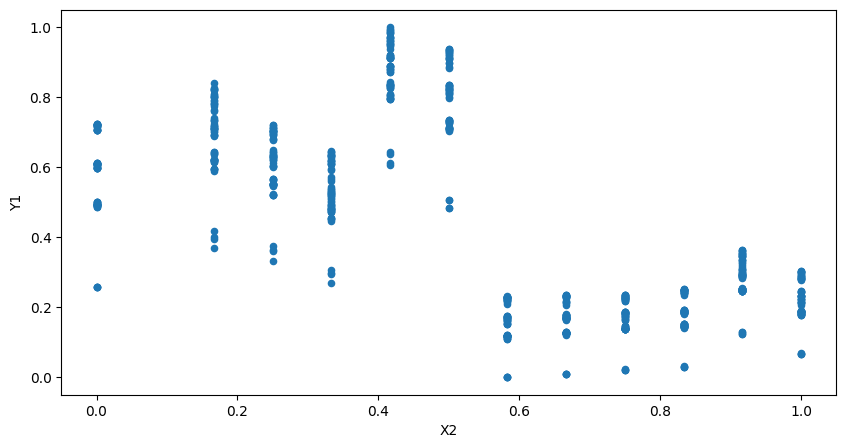

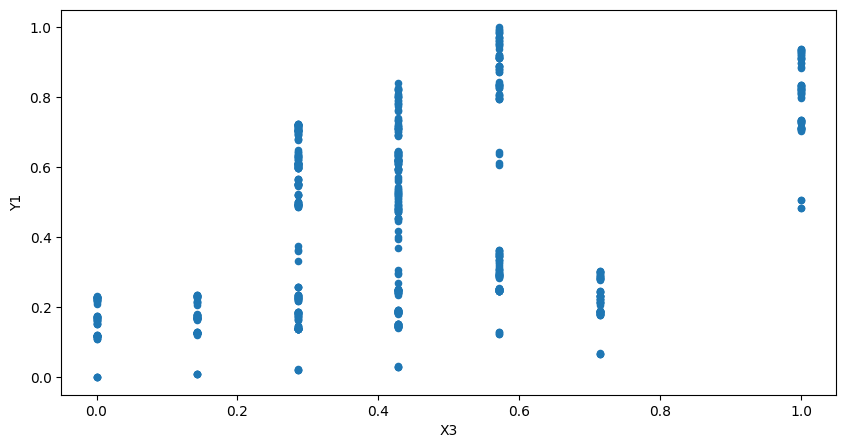

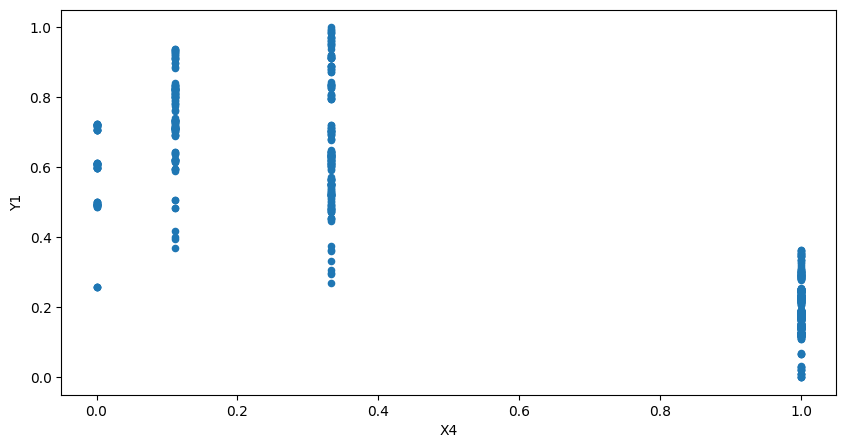

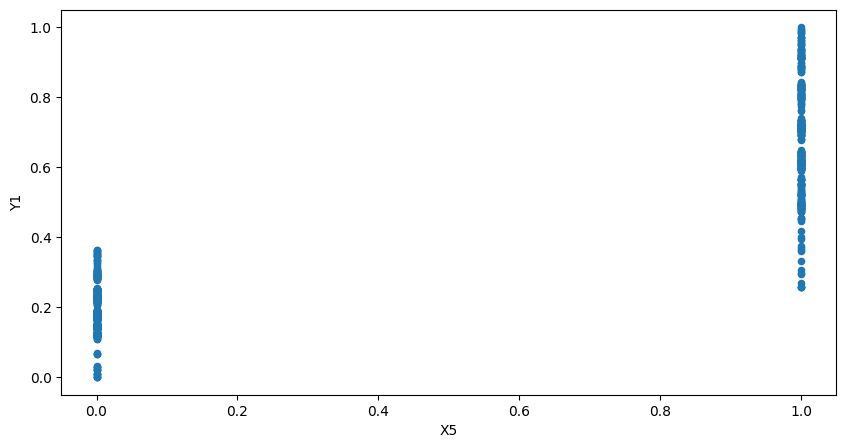

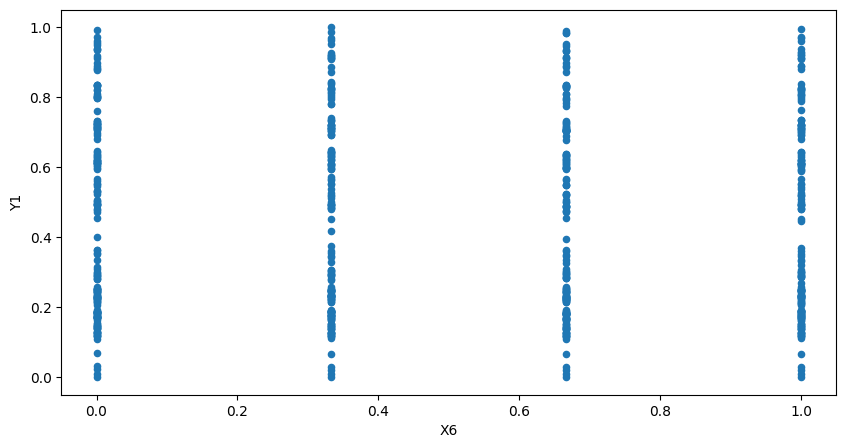

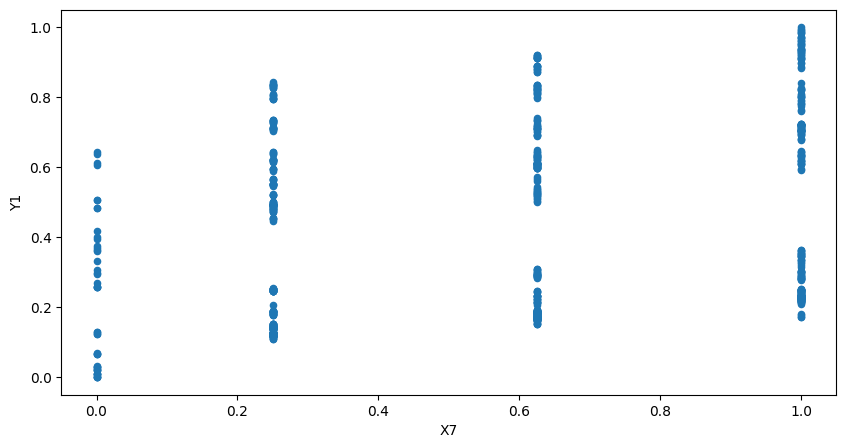

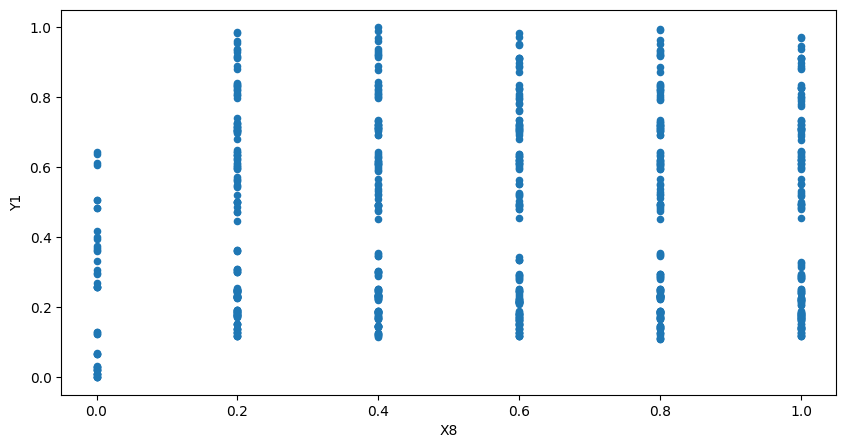

In [13]:
for column in df.columns[:-2]:
    df_normalize.plot.scatter(x=column, y='Y1')
    plt.show()

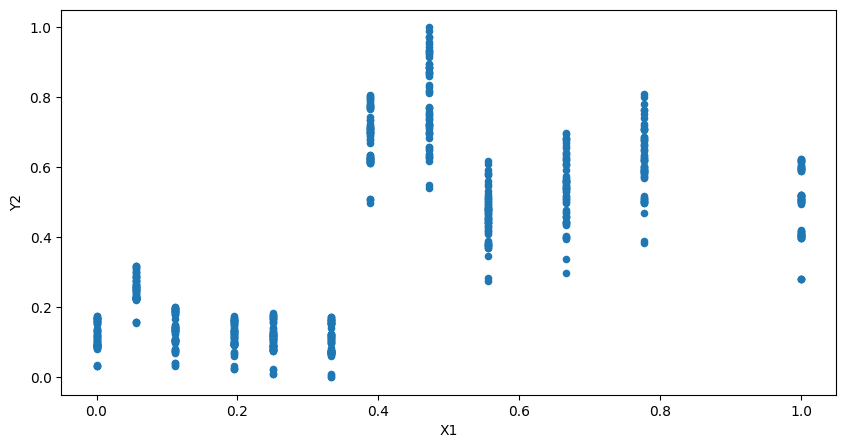

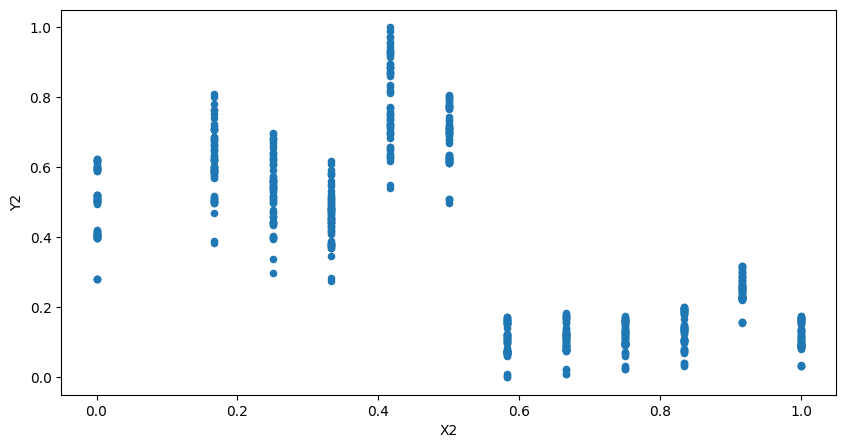

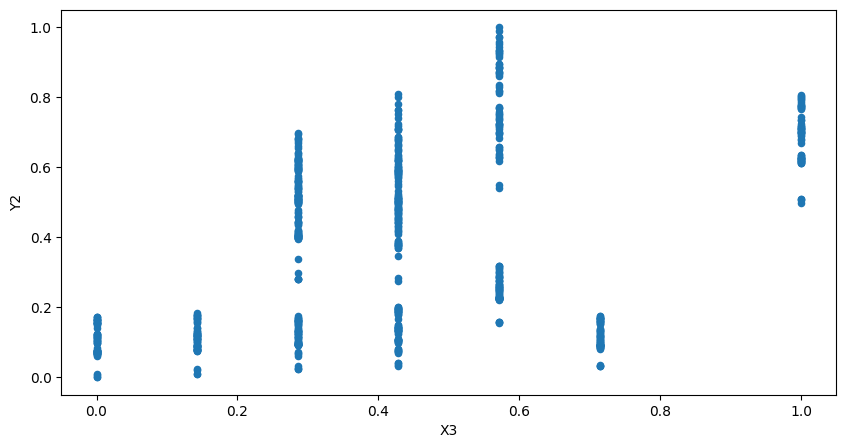

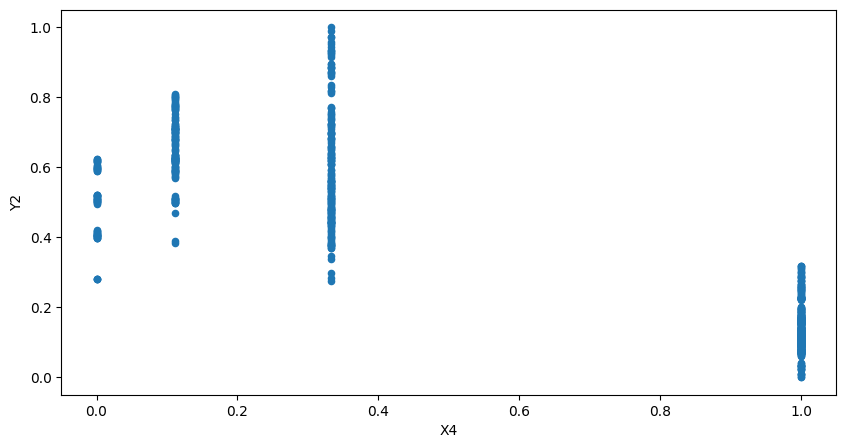

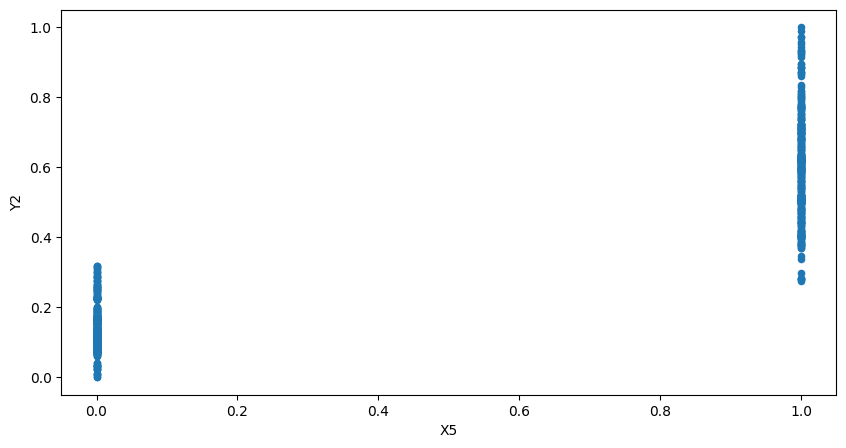

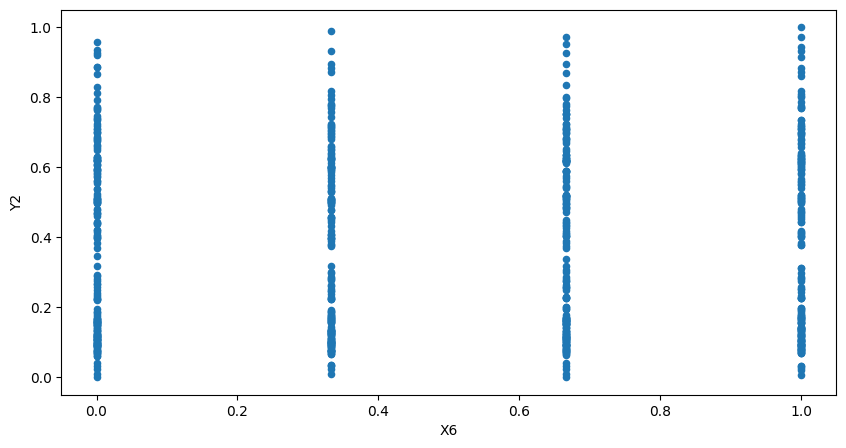

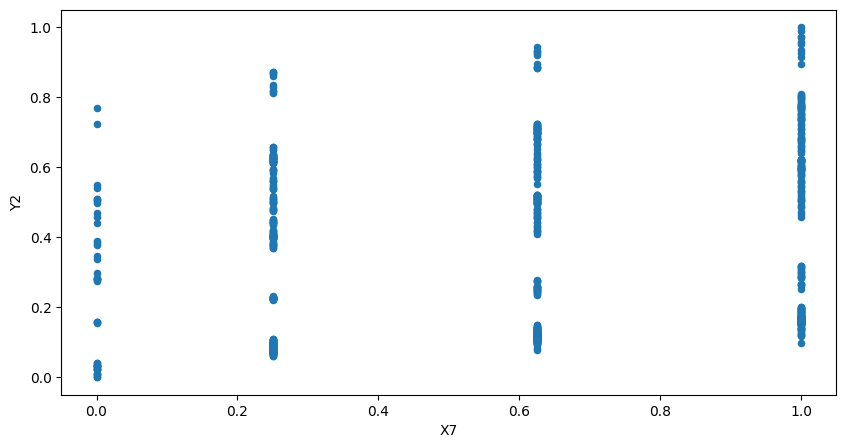

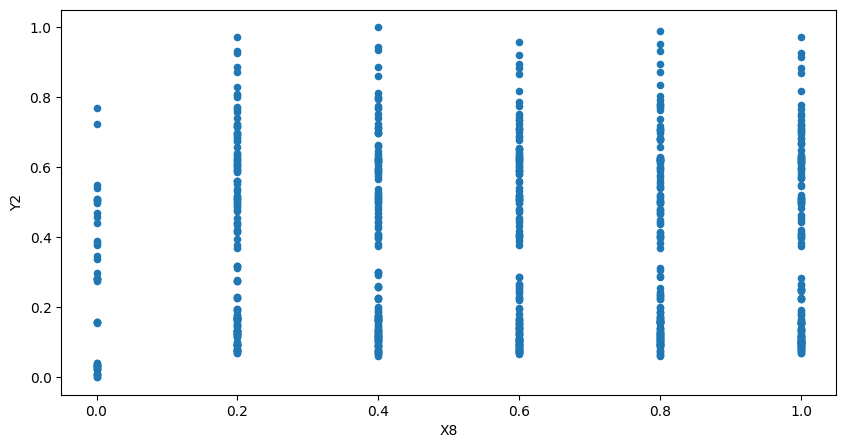

In [14]:
for column in df.columns[:-2]:
    df_normalize.plot.scatter(x=column, y='Y2')
    plt.show()

### Insight:
* There is no simple linear relationship between input and output variables

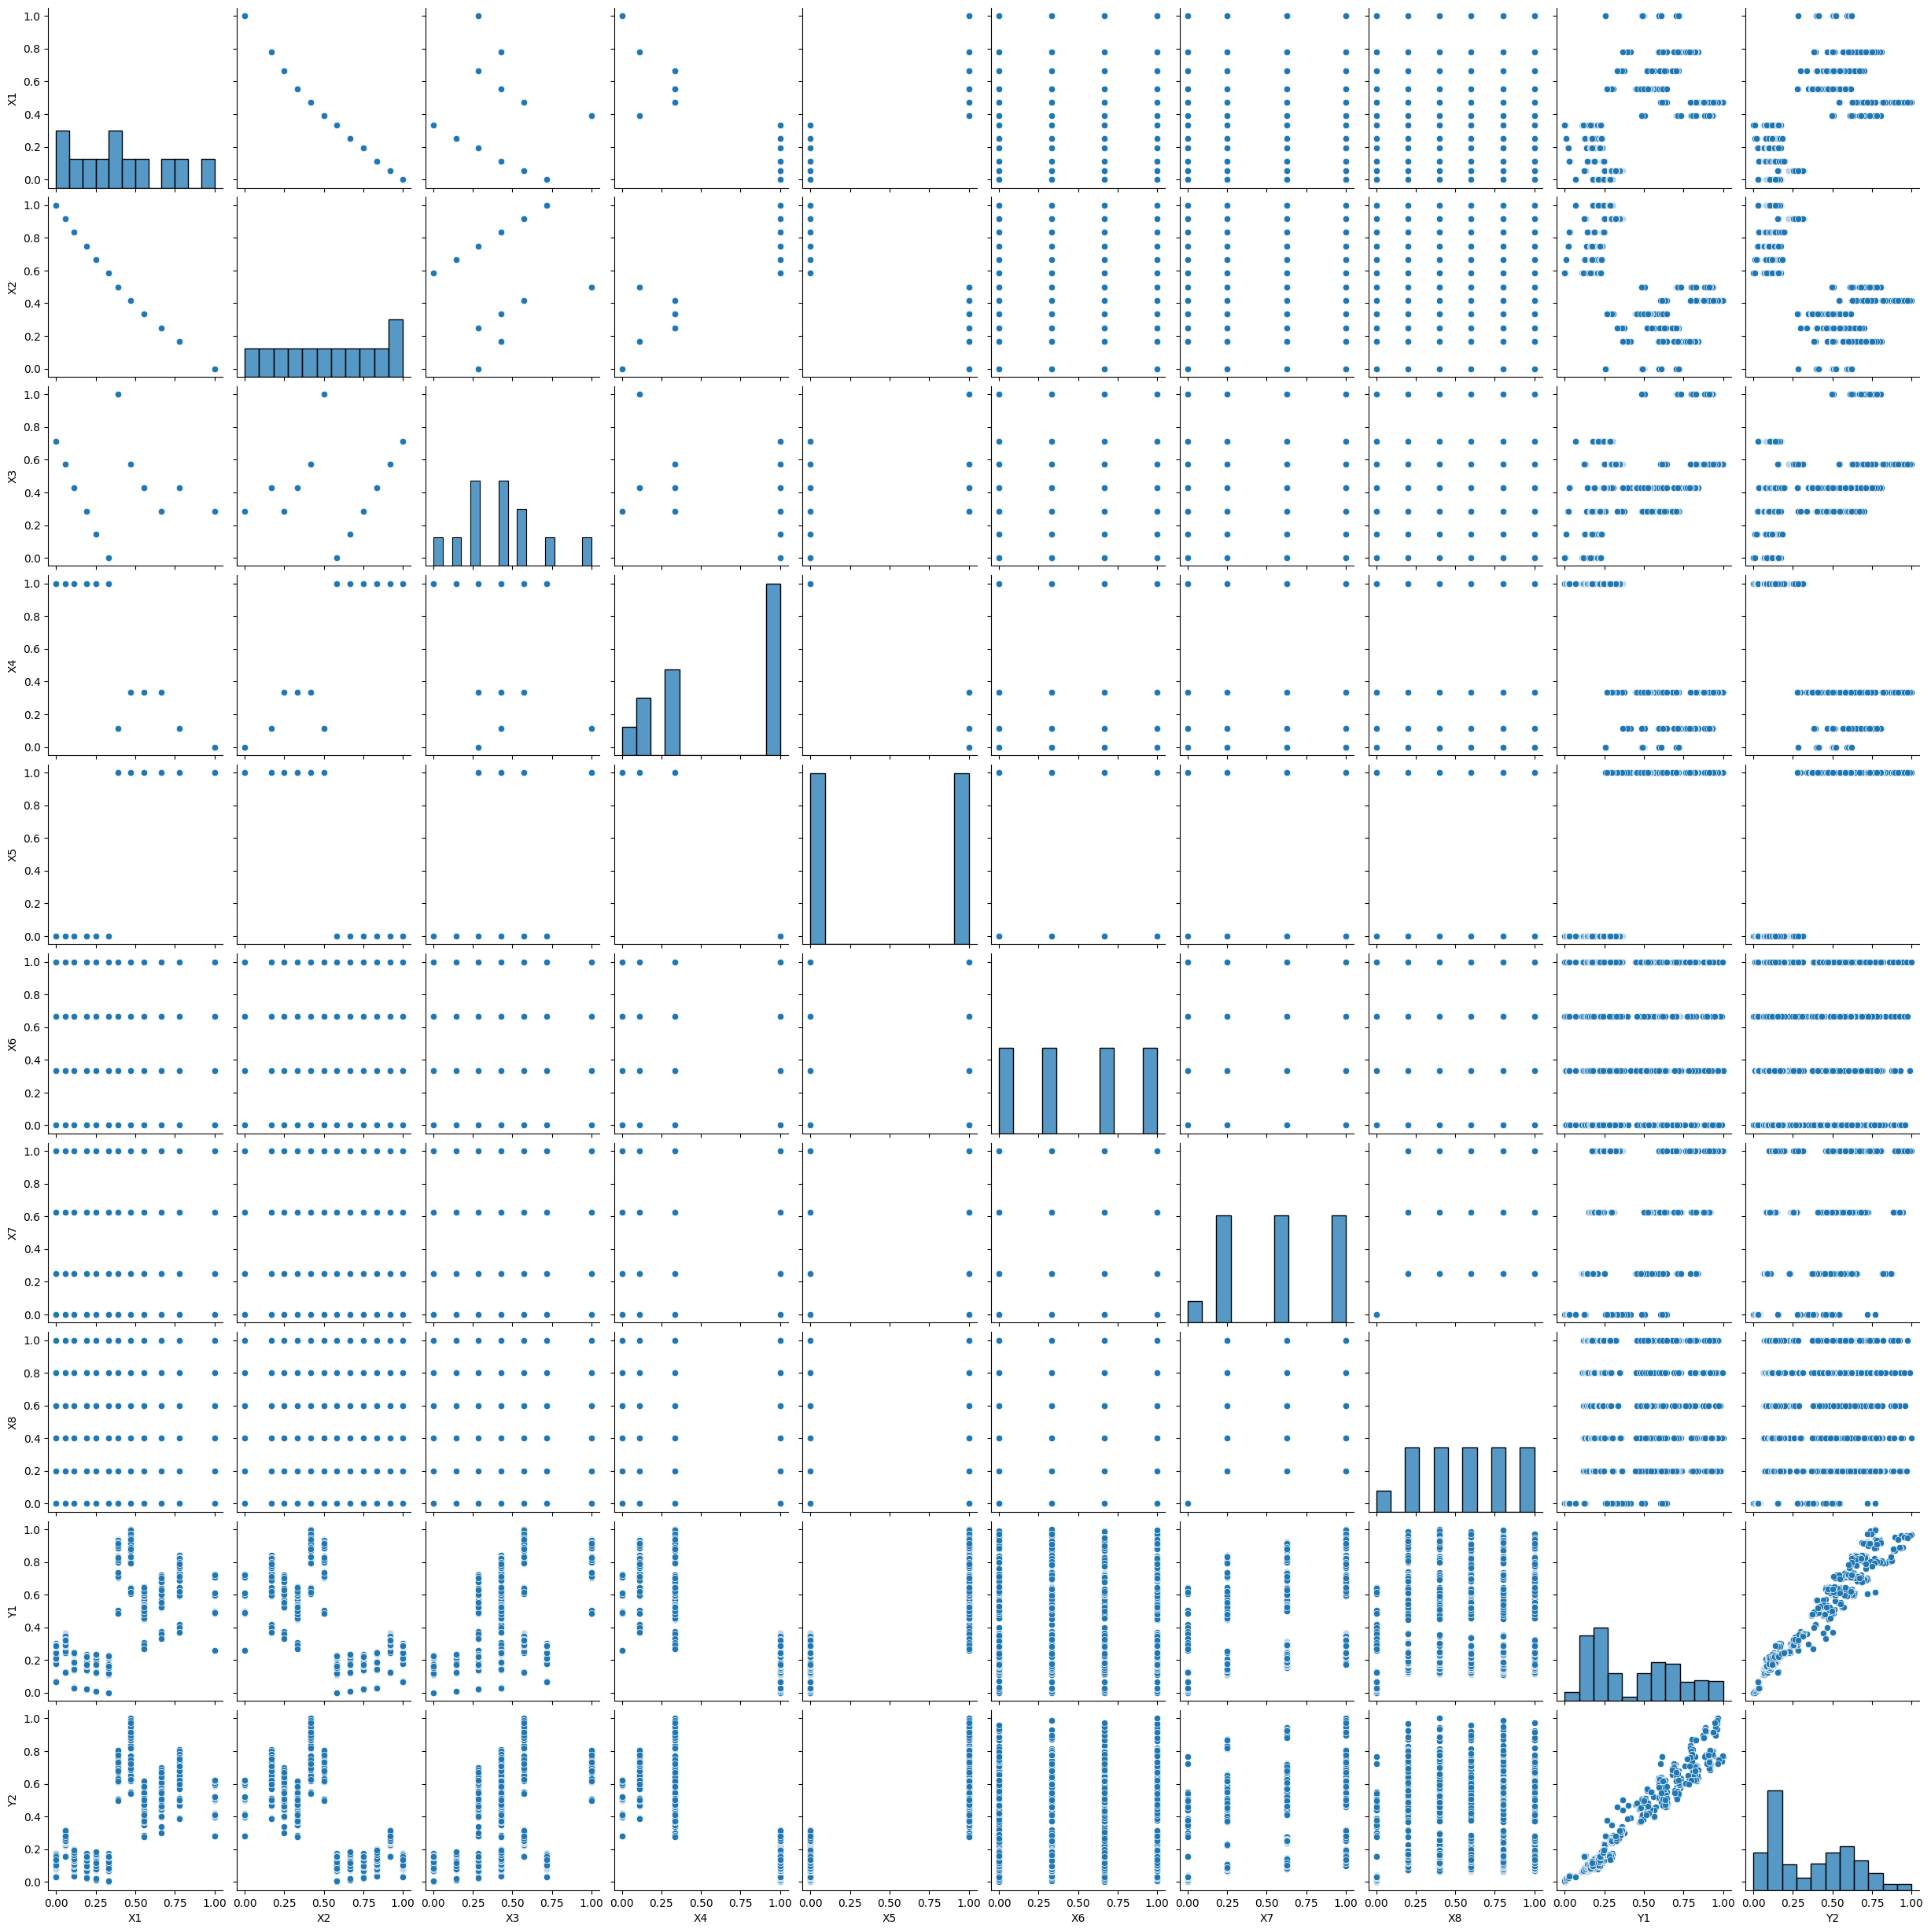

In [16]:
# use pairplot from seaborn
sns.pairplot(df_normalize)

### Check correlation between pairs of variables
* Spearman rank correlation coefficient assesses how well the relationship between two variables can be described by a monotonic function.
* The coefficient lies in the range between -1 and 1, where -1 indicates inversely proportional and 1 indicates proportional. The magnitude indicates the strength of the association.

In [25]:
corr_matrix = df_normalize.corr(method='spearman')
corr_matrix

In [26]:
# check how much each feature correlates with Y1 and Y2
corr_matrix['Y1'].sort_values(ascending=False)

Y1    1.000000
Y2    0.972689
X5    0.861283
X1    0.622135
X3    0.471458
X7    0.322860
X8    0.068343
X6   -0.004163
X2   -0.622135
X4   -0.804027
Name: Y1, dtype: float64

In [27]:
corr_matrix['Y2'].sort_values(ascending=False)

Y2    1.000000
Y1    0.972689
X5    0.864876
X1    0.651019
X3    0.415991
X7    0.288904
X8    0.046477
X6    0.017606
X2   -0.651019
X4   -0.803175
Name: Y2, dtype: float64

### Insight: 
* X1 (relative compactness), X2 (surface area), X4 (roof area) and X5 (overall height) are strongly correlated with both heating and cooling loads, whereas X6 (orientation) and X8 (glazing area distribution) are weakly correlated with the load.